In [1]:
import gensim
import gensim.corpora as corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from nltk.corpus import stopwords
#use wordnet lemmatizor, gensims lemmatizer is deactivated
from nltk.stem import WordNetLemmatizer
import pyLDAvis

In [2]:
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [3]:
#Need to add nltk stop_words
stop_words = set(stopwords.words('english'))

In [4]:
#read in file
with open('../data/data_simple_preprocess/bible_complete_simple_preprocess_sw_removed.txt', 'rb') as file:
    Church_fathers_complete_tokenized_simple_preprocess_sw_removed = pickle.load(file)

In [5]:
Church_fathers_complete_tokenized_simple_preprocess_sw_removed

['the',
 'first',
 'epistle',
 'of',
 'paul',
 'the',
 'apostle',
 'to',
 'the',
 'corinthians',
 'chapter',
 'paul',
 'called',
 'apostle',
 'jesus',
 'christ',
 'god',
 'sosthenes',
 'brother',
 'unto',
 'church',
 'god',
 'corinth',
 'sanctified',
 'christ',
 'jesus',
 'called',
 'saints',
 'place',
 'jesus',
 'christ',
 'lord',
 'their',
 'our',
 'grace',
 'unto',
 'you',
 'peace',
 'god',
 'father',
 'lord',
 'jesus',
 'christ',
 'thank',
 'god',
 'behalf',
 'grace',
 'god',
 'given',
 'jesus',
 'christ',
 'that',
 'thing',
 'ye',
 'enriched',
 'him',
 'utterance',
 'knowledge',
 'even',
 'testimony',
 'christ',
 'confirmed',
 'you',
 'so',
 'ye',
 'come',
 'gift',
 'waiting',
 'coming',
 'lord',
 'jesus',
 'christ',
 'who',
 'shall',
 'confirm',
 'unto',
 'end',
 'ye',
 'blameless',
 'day',
 'lord',
 'jesus',
 'christ',
 'god',
 'faithful',
 'ye',
 'called',
 'unto',
 'fellowship',
 'son',
 'jesus',
 'christ',
 'lord',
 'now',
 'beseech',
 'you',
 'brethren',
 'lord',
 'jesus',
 

In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(Church_fathers_complete_tokenized_simple_preprocess_sw_removed, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[Church_fathers_complete_tokenized_simple_preprocess_sw_removed], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[(Church_fathers_complete_tokenized_simple_preprocess_sw_removed)[100:110]]])


In [7]:
# Step 2: Convert each element to a list of words if it's a string
Church_fathers_complete_tokenized_simple_preprocess_sw_removed = [
    verse.split() if isinstance(verse, str) else verse
    for verse in Church_fathers_complete_tokenized_simple_preprocess_sw_removed
]

In [8]:
print(type(Church_fathers_complete_tokenized_simple_preprocess_sw_removed))  # Should be <class 'list'>
print(type(Church_fathers_complete_tokenized_simple_preprocess_sw_removed[0]))  # Should be <class 'list'>
print(type(Church_fathers_complete_tokenized_simple_preprocess_sw_removed[0][0]))  # Should be <class 'str'>

<class 'list'>
<class 'list'>
<class 'str'>


In [9]:

# Create Dictionary
id2word = corpora.Dictionary(Church_fathers_complete_tokenized_simple_preprocess_sw_removed)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in Church_fathers_complete_tokenized_simple_preprocess_sw_removed]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=6, 
                                            random_state=42,
                                            update_every=1,
                                            chunksize=10,
                                            passes=10,
                                            alpha='symmetric',
                                            iterations=100,
                                            per_word_topics=True)


In [10]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.072*"thee" + 0.065*"thou" + 0.063*"ye" + 0.060*"me" + 0.043*"judah" + 0.038*"hand" + 0.028*"him" + 0.023*"inhabitants" + 0.019*"desolation" + 0.017*"seek"'), (1, '0.294*"lord" + 0.065*"thy" + 0.061*"them" + 0.054*"said" + 0.037*"man" + 0.031*"like" + 0.025*"away" + 0.024*"great" + 0.023*"came" + 0.019*"turn"'), (2, '0.095*"unto" + 0.048*"house" + 0.044*"land" + 0.036*"god" + 0.033*"earth" + 0.029*"forth" + 0.027*"in" + 0.027*"chapter" + 0.026*"king" + 0.026*"bring"'), (3, '0.343*"shall" + 0.049*"hosts" + 0.046*"saith" + 0.044*"people" + 0.032*"pass" + 0.021*"men" + 0.019*"you" + 0.018*"let" + 0.017*"saying" + 0.015*"sea"'), (4, '0.124*"day" + 0.033*"hath" + 0.027*"nations" + 0.026*"for" + 0.025*"eyes" + 0.024*"then" + 0.019*"city" + 0.019*"heart" + 0.017*"page" + 0.016*"lie"'), (5, '0.153*"and" + 0.068*"jerusalem" + 0.060*"come" + 0.045*"the" + 0.036*"cut" + 0.028*"midst" + 0.024*"behold" + 0.023*"it" + 0.022*"gather" + 0.018*"son"')]


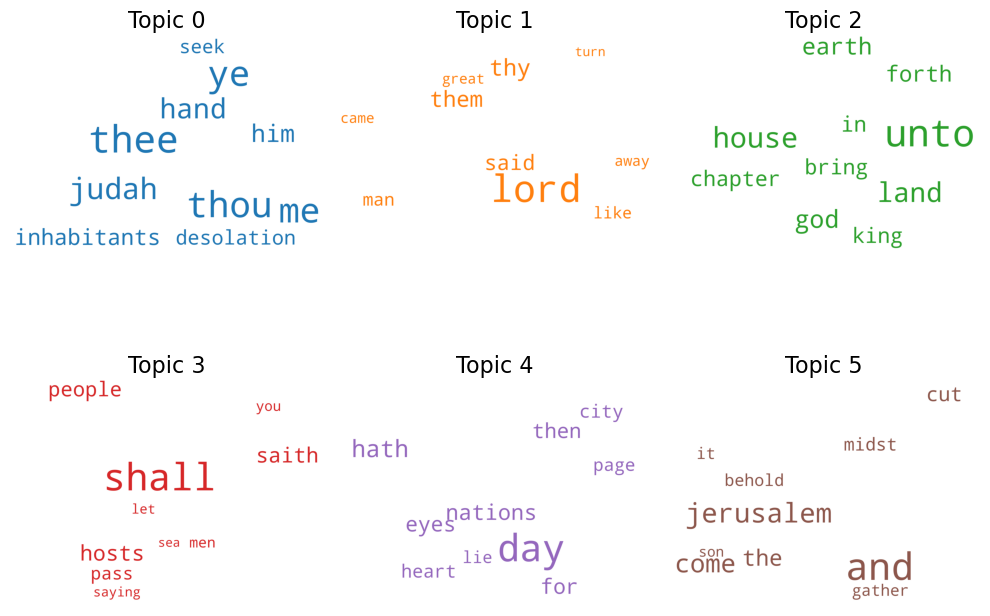

In [11]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(10,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [12]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds')
pyLDAvis.display(vis)

C:\Users\micha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
